In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import shapefile as shp
from shapely.geometry import Point
sns.set_style('whitegrid')

In [4]:
fp = r'/home/t-sahuja/cultural_artifacts/notebooks/india-polygon.shp'
map_df = gpd.read_file(fp) 
map_df_copy = gpd.read_file(fp)
map_df.head()

,id,st_nm,geometry
0,NaN,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0..."
1,NaN,Arunachal Pradesh,"POLYGON ((95.23643 26.68105, 95.19594 27.03612..."
2,NaN,Assam,"POLYGON ((95.19594 27.03612, 95.08795 26.94578..."
3,NaN,Bihar,"POLYGON ((88.11357 26.54028, 88.28006 26.37640..."
4,NaN,Chandigarh,"POLYGON ((76.84208 30.76124, 76.83758 30.72552..."


In [5]:
map_df['st_nm']

0     Andaman and Nicobar Islands
1               Arunachal Pradesh
2                           Assam
3                           Bihar
4                      Chandigarh
5                    Chhattisgarh
6          Dadra and Nagar Haveli
7                   Daman and Diu
8                             Goa
9                         Gujarat
10                        Haryana
11               Himachal Pradesh
12                      Jharkhand
13                      Karnataka
14                         Kerala
15                    Lakshadweep
16                 Madhya Pradesh
17                    Maharashtra
18                        Manipur
19                      Meghalaya
20                        Mizoram
21                       Nagaland
22                          Delhi
23                     Puducherry
24                         Punjab
25                      Rajasthan
26                         Sikkim
27                     Tamil Nadu
28                      Telangana
29            

In [7]:
results = pd.read_csv('/home/t-sahuja/cultural_artifacts/notebooks/results_plot.csv')

In [ ]:
results.columns

In [8]:
list_of_results = []
li_models = ['Llama 2', 'Falcon', 'GPT-4', 'Palm 2']
for model in li_models:
    score_data = {
        'State': results['States'],
        'Score': results[model]
    }
    list_of_results.append(pd.DataFrame(score_data))

In [ ]:
list_of_results[0]

In [ ]:
merged_llama = map_df.set_index('st_nm').join(list_of_results[0].set_index('State'))

In [ ]:
merged_llama['Score'] = merged_llama['Score'].replace(np.nan, 0)

In [ ]:
#Create figure and axes for Matplotlib and set the title
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Accuracy of Llama2', fontdict={'fontsize': '20', 'fontweight' : '10'})
merged_llama.plot(column='Score',cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0',legend=True,markersize=[39.739192, -104.990337], legend_kwds={'label': "Number of landslides"})


In [1]:
def create_heatmap(df, map_df):
    merged = map_df.set_index('st_nm').join(df.set_index('State'))
    merged['Score'] = merged['Score'].replace(np.nan, 0)
    return merged

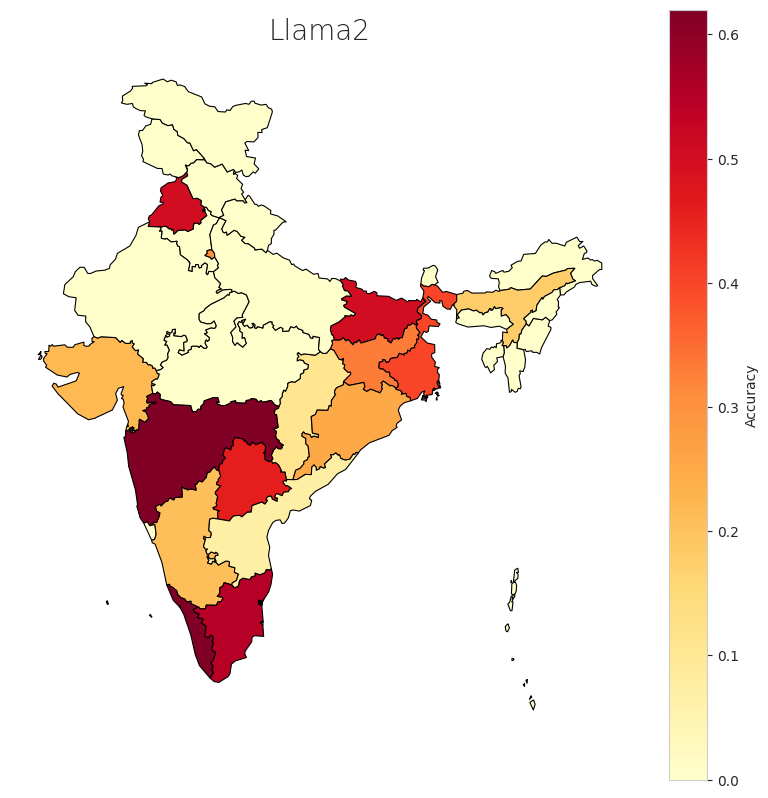

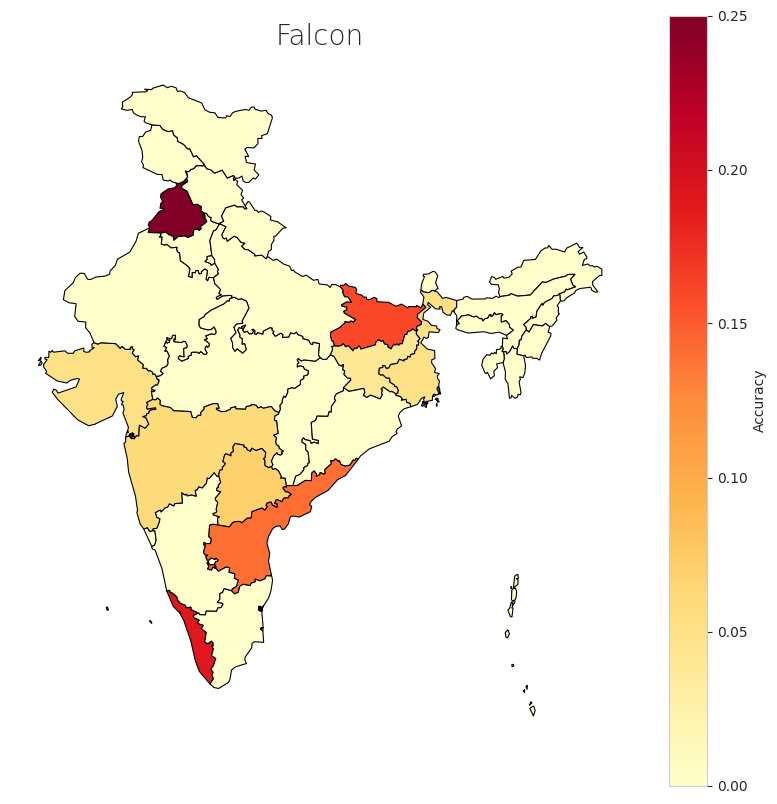

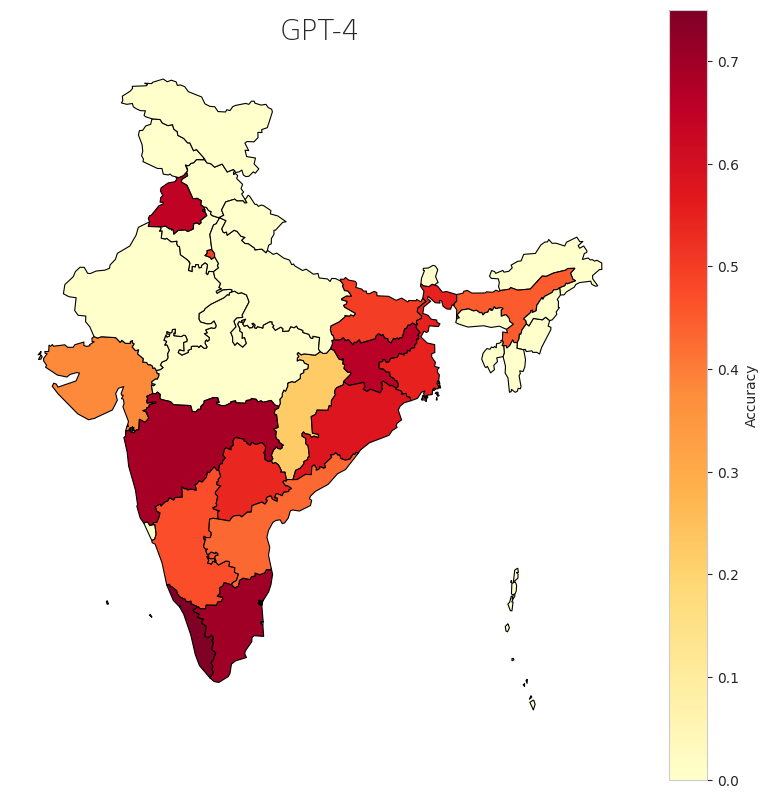

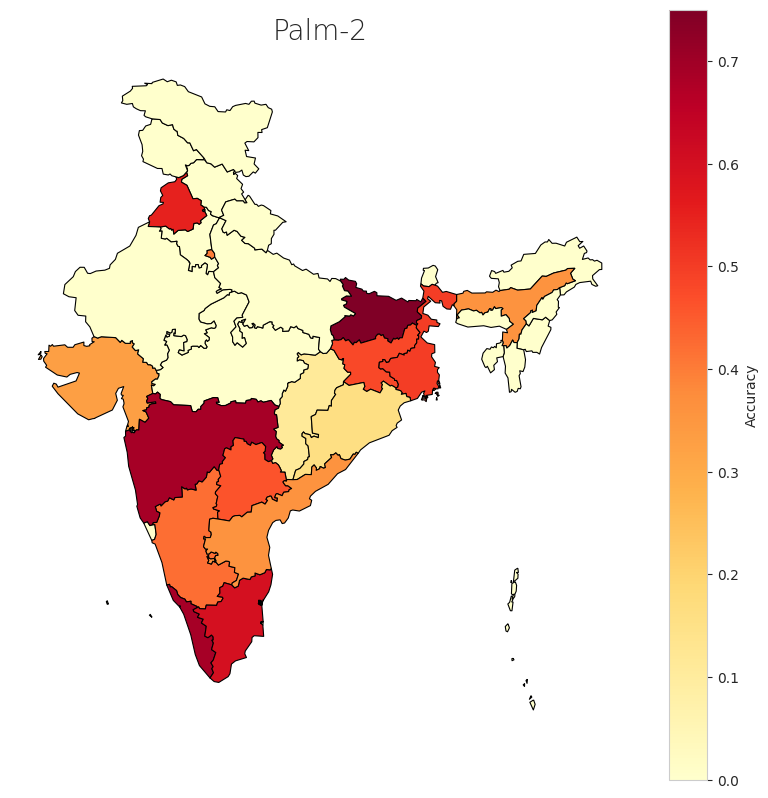

In [11]:
llama2, falcon, gpt4, palm2 = (
    create_heatmap("Llama2", list_of_results[0]),
    create_heatmap("Falcon", list_of_results[1]),
    create_heatmap("GPT-4", list_of_results[2]),
    create_heatmap("Palm-2", list_of_results[3]),
)

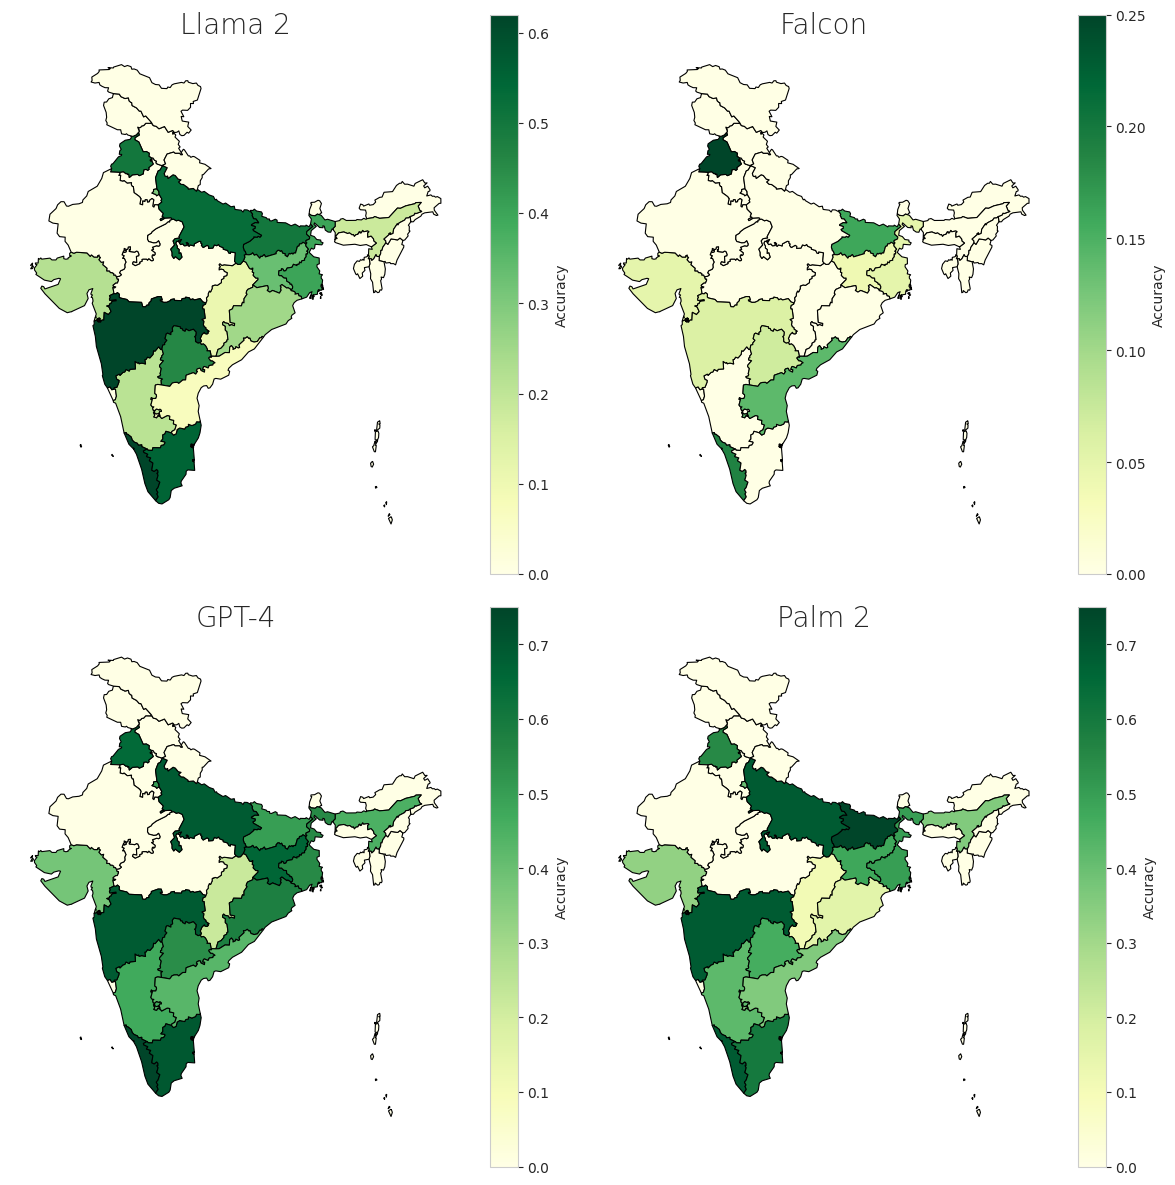

In [15]:
# Create a 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Define titles for each heatmap
titles = ["Llama 2", "Falcon", "GPT-4", "Palm 2"]

df1, df2, df3, df4 = (
    list_of_results[0],
    list_of_results[1],
    list_of_results[2],
    list_of_results[3],
)
# Iterate through dataframes and titles
for i, (df, title) in enumerate(zip([df1, df2, df3, df4], titles)):
    # Calculate the subplot position
    row = i // 2
    col = i % 2

    # Call your create_heatmap function for each dataframe
    merged = create_heatmap(df, map_df)  # Assuming map_df is defined somewhere

    # Plot the heatmap in the appropriate subplot
    ax = axs[row, col]
    ax.axis("off")
    ax.set_title(title, fontdict={"fontsize": "20", "fontweight": "10"})
    # sns.heatmap(data=merged[['Score']], cmap="YlOrRd", linewidths=0.8, ax=ax, cbar=True, cbar_kws={"label": "Accuracy"})

# Adjust spacing between subplots
    merged.plot(
        column="Score",
        cmap="YlGn",
        linewidth=0.8,
        ax=ax,
        edgecolor="0",
        legend=True,
        legend_kwds={"label": "Accuracy"},
    )

# Adjust spacing between subplots
plt.tight_layout()
plt.savefig('heatmaps_india.pdf')
# Show the plot
plt.show()